In [1]:
pip install pandas numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

orders = pd.read_csv("orders.csv")
print(orders.head())
print(orders.columns)


   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')


In [4]:
total_orders_df = orders.groupby('user_id')['order_number'].max().reset_index()
total_orders_df.columns = ['user_id', 'total_orders']
print(total_orders_df.head())


   user_id  total_orders
0        1            11
1        2            15
2        3            13
3        4             6
4        5             5


In [26]:
pip install mysql-connector-python


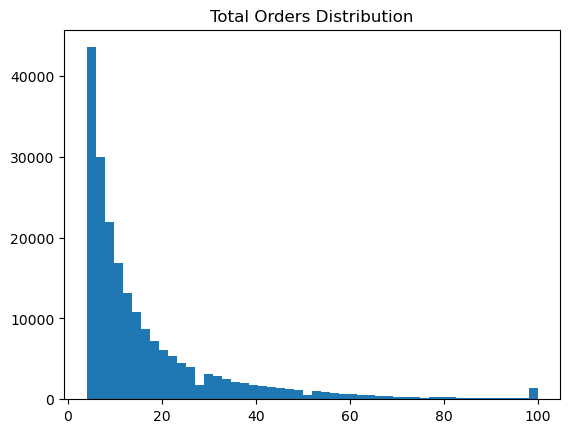

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = total_orders_df[['total_orders']].values

kmeans = KMeans(n_clusters=4, random_state=42)
total_orders_df['cluster'] = kmeans.fit_predict(X)

plt.hist(total_orders_df['total_orders'], bins=50)
plt.title("Total Orders Distribution")
plt.show()


In [6]:
import pandas as pd

orders = pd.read_csv("orders.csv")

total_orders_df = orders.groupby('user_id')['order_number'].max().reset_index()
total_orders_df.columns = ['user_id', 'total_orders']

X = total_orders_df[['total_orders']].values


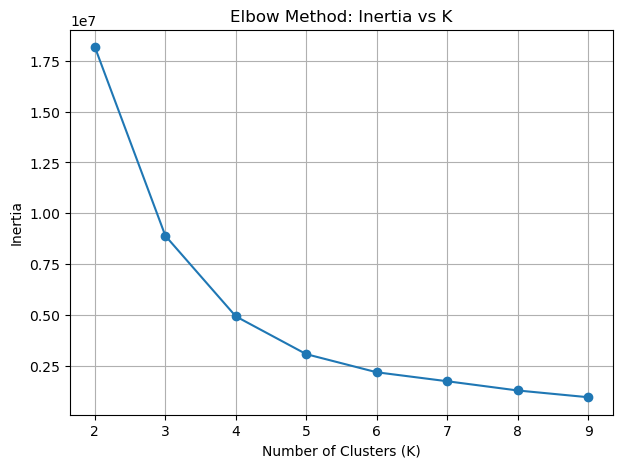

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

K_range = range(2, 10)
inertia_list = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

# 시각화
plt.figure(figsize=(7,5))
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Method: Inertia vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
pd.read_csv('order_products__prior.csv').shape

(32434489, 4)

In [4]:
import pandas as pd

# Load data
orders = pd.read_csv("orders.csv")
order_prior = pd.read_csv("order_products__prior.csv")

order_prior = order_prior.merge(
    orders[["order_id", "user_id"]],
    on="order_id",
    how="left"
)

cust_orders = orders.groupby("user_id").agg(
    total_orders=("order_number", "max")
).reset_index()

cust_items = order_prior.groupby("user_id").agg(
    total_items=("product_id", "count"),
    distinct_products=("product_id", "nunique"),
    total_reorders=("reordered", "sum")
).reset_index()

cust_items["reorder_rate"] = cust_items["total_reorders"] / cust_items["total_items"]

df_customers = cust_orders.merge(cust_items, on="user_id", how="left")

df_customers["avg_basket_size"] = df_customers["total_items"] / df_customers["total_orders"]

df_customers = df_customers.fillna(0)

print(df_customers.head())
print(df_customers.columns)


   user_id  total_orders  total_items  distinct_products  total_reorders  \
0        1            11           59                 18              41   
1        2            15          195                102              93   
2        3            13           88                 33              55   
3        4             6           18                 17               1   
4        5             5           37                 23              14   

   reorder_rate  avg_basket_size  
0      0.694915         5.363636  
1      0.476923        13.000000  
2      0.625000         6.769231  
3      0.055556         3.000000  
4      0.378378         7.400000  
Index(['user_id', 'total_orders', 'total_items', 'distinct_products',
       'total_reorders', 'reorder_rate', 'avg_basket_size'],
      dtype='object')


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load data
orders = pd.read_csv("orders.csv")
order_products = pd.read_csv("order_products__prior.csv")
products = pd.read_csv("products.csv")
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")

# Merge tables
df = (order_products
      .merge(products, on="product_id", how="left")
      .merge(aisles, on="aisle_id", how="left")
      .merge(departments, on="department_id", how="left")
      .merge(orders[['order_id','user_id','order_number','order_dow','order_hour_of_day']], 
             on="order_id", how="left"))


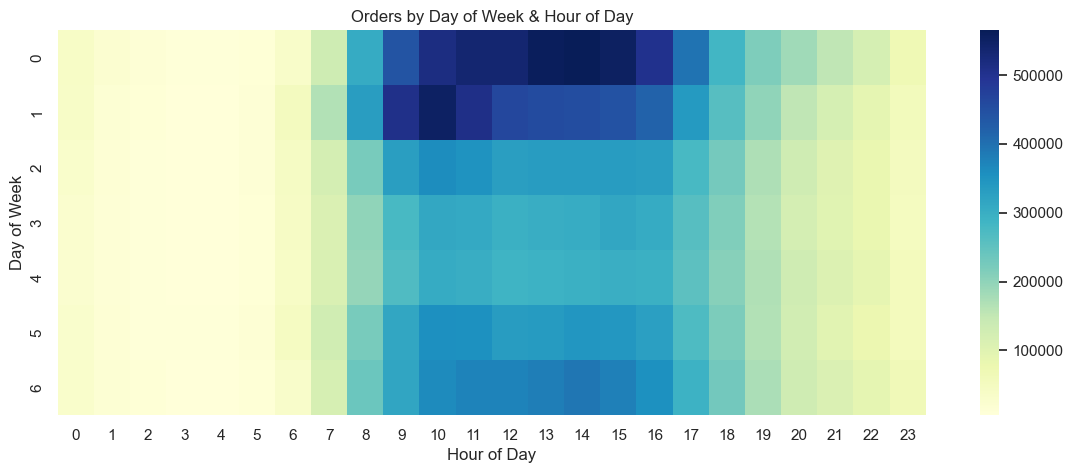

In [7]:
activity = df.groupby(["order_dow", "order_hour_of_day"])["order_id"].count().reset_index()
activity_pivot = activity.pivot(index="order_dow", columns="order_hour_of_day", values="order_id")

plt.figure(figsize=(14, 5))
sns.heatmap(activity_pivot, cmap="YlGnBu")
plt.title("Orders by Day of Week & Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


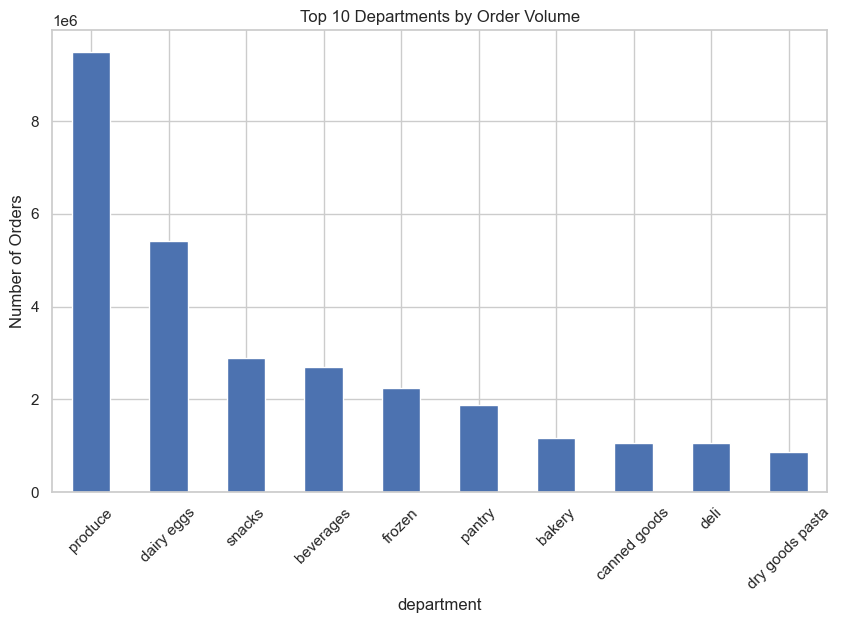

In [8]:
dept_share = (df.groupby("department")["order_id"].count()
                .sort_values(ascending=False)
                .head(10))

plt.figure(figsize=(10, 6))
dept_share.plot(kind="bar")
plt.title("Top 10 Departments by Order Volume")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


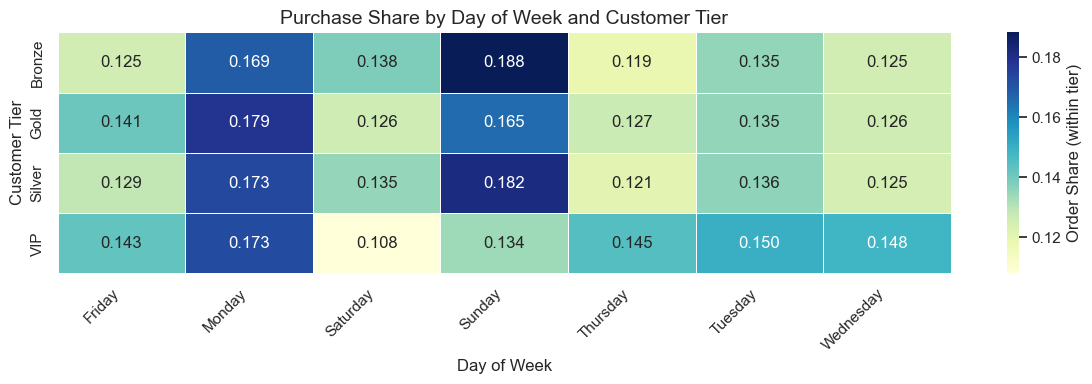

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sns.set(style="whitegrid")

orders = pd.read_csv("orders.csv", usecols=["order_id", "user_id", "order_dow", "order_number"])
order_products = pd.read_csv("order_products__prior.csv", usecols=["order_id"])

user_orders = orders.groupby("user_id")["order_number"].max().reset_index()
user_orders.rename(columns={"order_number": "total_orders"}, inplace=True)

kmeans = KMeans(n_clusters=4, random_state=42)
user_orders["cluster"] = kmeans.fit_predict(user_orders[["total_orders"]])

# map clusters → tiers in order of purchase volume
cluster_order = user_orders.groupby("cluster")["total_orders"].mean().sort_values().index
tiers = ["Bronze", "Silver", "Gold", "VIP"]
cluster_to_tier = {cluster_order[i]: tiers[i] for i in range(4)}

user_orders["tier"] = user_orders["cluster"].map(cluster_to_tier)

orders = orders.merge(user_orders[["user_id", "tier"]], on="user_id", how="left")

# keep only orders that appear in prior table
orders = orders[orders["order_id"].isin(order_products["order_id"])]

dow_map = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday',
           4:'Thursday', 5:'Friday', 6:'Saturday'}

orders["weekday"] = orders["order_dow"].map(dow_map)

weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

counts = (orders.groupby(["tier", "weekday"])["order_id"]
          .count()
          .reset_index(name="orders"))

# ensure all combinations exist
idx = pd.MultiIndex.from_product([tiers, weekday_order], names=["tier","weekday"])
counts = counts.set_index(["tier","weekday"]).reindex(idx, fill_value=0).reset_index()

# normalize within each tier
counts["tier_total"] = counts.groupby("tier")["orders"].transform("sum")
counts["share"] = counts["orders"] / counts["tier_total"]

# pivot for heatmap
heatmap_df = counts.pivot(index="tier", columns="weekday", values="share")

plt.figure(figsize=(12, 4))
sns.heatmap(
    heatmap_df,
    cmap="YlGnBu",
    annot=True,
    fmt=".3f",
    linewidths=.5,
    cbar_kws={"label": "Order Share (within tier)"}
)

plt.title("Purchase Share by Day of Week and Customer Tier", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Customer Tier")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

file_path = "orders.csv"  
orders = pd.read_csv(file_path)

orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [13]:
# Aggregate by day of week and hour of day
dow_hour_pivot = (
    orders
    .groupby(['order_dow', 'order_hour_of_day'])['order_id']
    .nunique()
    .reset_index()
    .pivot(index='order_dow', columns='order_hour_of_day', values='order_id')
)

dow_hour_pivot


order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


<Figure size 1200x500 with 0 Axes>

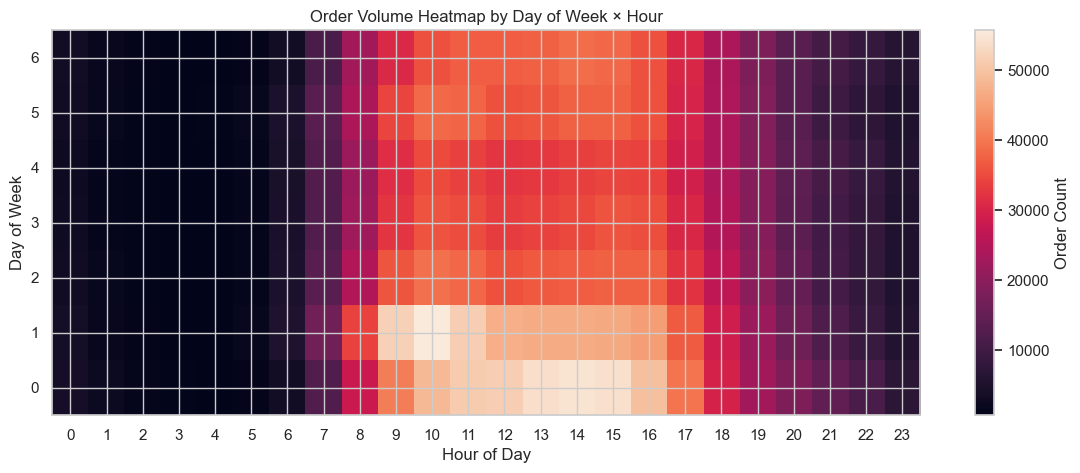

In [14]:
# Heatmap
plt.figure(figsize=(14, 5))
plt.imshow(dow_hour_pivot, aspect='auto', origin='lower')
plt.colorbar(label="Order Count")

plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")

plt.xticks(range(0, 24))
plt.yticks(range(0, 7))

plt.title("Order Volume Heatmap by Day of Week × Hour")
plt.show()


In [15]:
# Customer tiers
labels = ['Bronze', 'Silver', 'Gold', 'VIP']

# Compute total orders per customer to assign tiers
user_order_cnt = (
    orders
    .groupby('user_id')['order_number']
    .max()
    .reset_index(name='total_orders')
)

try:
    user_order_cnt['tier'] = pd.qcut(
        user_order_cnt['total_orders'], q=4, labels=labels
    )
except ValueError:
    ranked = user_order_cnt['total_orders'].rank(method='first')
    user_order_cnt['tier'] = pd.qcut(
        ranked, q=4, labels=labels
    )

# Merge tier back to orders
orders_with_tier = orders.merge(
    user_order_cnt[['user_id', 'tier']],
    on='user_id',
    how='left'
)

# Aggregate hourly count by tier
hourly_by_tier = (
    orders_with_tier
    .groupby(['order_hour_of_day', 'tier'])['order_id']
    .nunique()
    .reset_index(name='order_count')
)

# Pivot for visualization
hourly_by_tier_pivot = hourly_by_tier.pivot(
    index='order_hour_of_day',
    columns='tier',
    values='order_count'
).fillna(0)


C:\Users\jo.hy\AppData\Local\Temp\ipykernel_17588\2381278797.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['order_hour_of_day', 'tier'])['order_id']


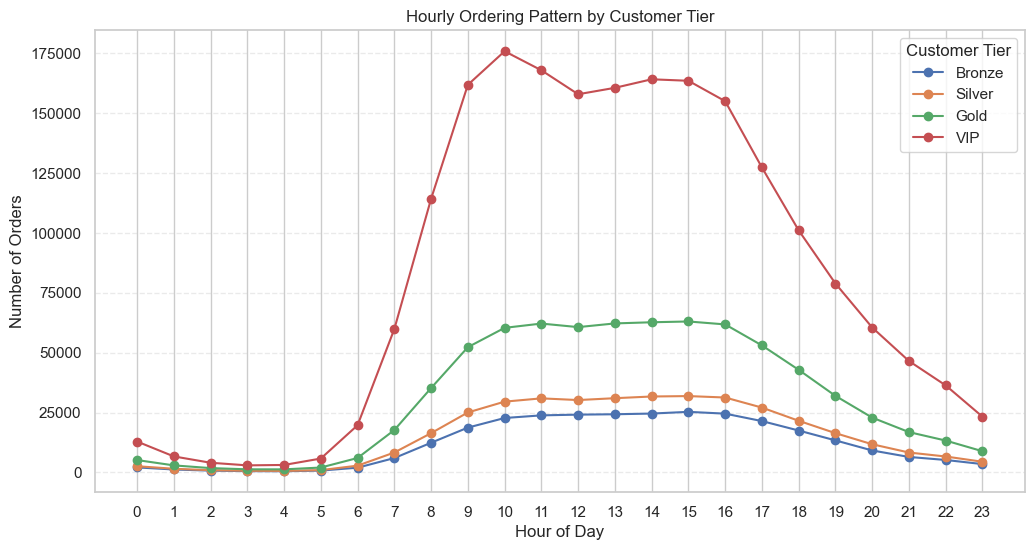

In [16]:
plt.figure(figsize=(12, 6))

for tier in labels:
    if tier in hourly_by_tier_pivot.columns:
        plt.plot(
            hourly_by_tier_pivot.index,
            hourly_by_tier_pivot[tier],
            marker='o',
            label=tier
        )

plt.xticks(range(0, 24))
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.title("Hourly Ordering Pattern by Customer Tier")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title="Customer Tier")
plt.show()


In [18]:
products = pd.read_csv("products.csv")
products.columns



Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute hourly order counts for each tier
hourly_by_tier = (
    orders_with_tier
    .groupby(['tier', 'order_hour_of_day'])['order_id']
    .nunique()
    .reset_index(name='order_count')
)

# Compute standard deviation per tier
tier_std = (
    hourly_by_tier
    .groupby('tier')['order_count']
    .std()
    .reset_index(name='std_dev')
)

tier_std


C:\Users\jo.hy\AppData\Local\Temp\ipykernel_17588\391292167.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['tier', 'order_hour_of_day'])['order_id']
C:\Users\jo.hy\AppData\Local\Temp\ipykernel_17588\391292167.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('tier')['order_count']


,tier,std_dev
0,Bronze,9856.605257
1,Silver,12574.316860
2,Gold,25140.142826
3,VIP,66913.849261


<Figure size 800x500 with 0 Axes>

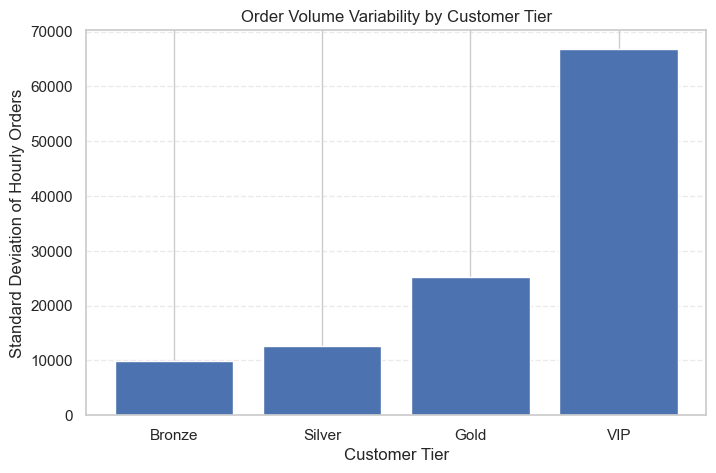

In [20]:
plt.figure(figsize=(8, 5))
plt.bar(tier_std['tier'], tier_std['std_dev'])

plt.xlabel("Customer Tier")
plt.ylabel("Standard Deviation of Hourly Orders")
plt.title("Order Volume Variability by Customer Tier")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

C:\Users\jo.hy\AppData\Local\Temp\ipykernel_17588\3049235201.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=customer_data, x='tier', y='avg_reorder_interval', palette='viridis', ci=None)
C:\Users\jo.hy\AppData\Local\Temp\ipykernel_17588\3049235201.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_data, x='tier', y='avg_reorder_interval', palette='viridis', ci=None)


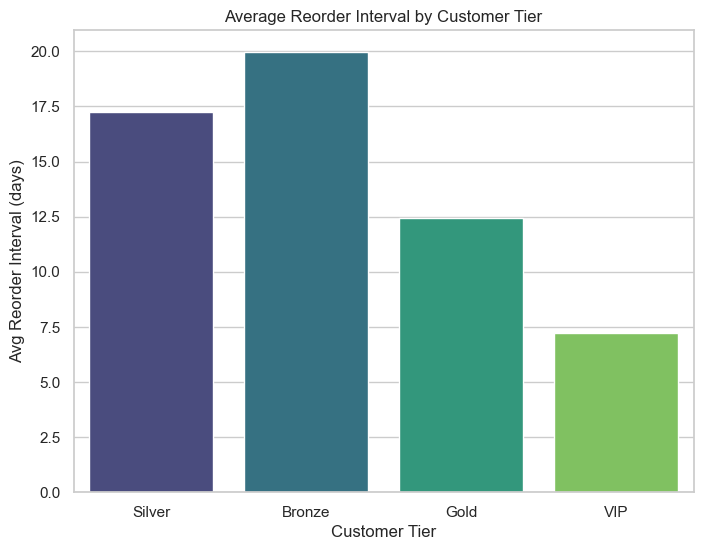

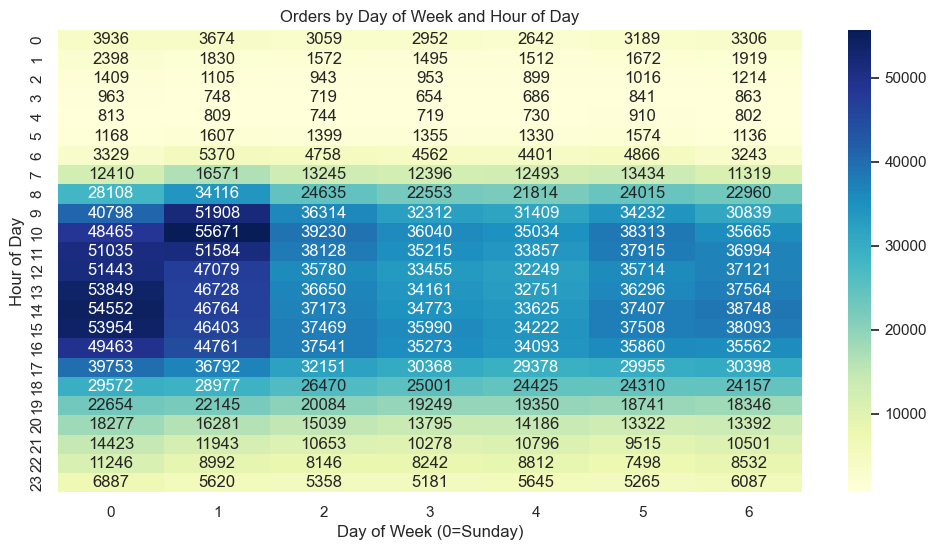

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

orders = pd.read_csv('orders.csv')  # order_id, user_id, order_dow, order_hour_of_day, days_since_prior_order

total_orders = orders.groupby('user_id')['order_id'].nunique().reset_index()
total_orders.columns = ['user_id', 'total_orders']

def assign_tier(total_orders):
    if total_orders <= 5:
        return 'Bronze'
    elif total_orders <= 15:
        return 'Silver'
    elif total_orders <= 30:
        return 'Gold'
    else:
        return 'VIP'

total_orders['tier'] = total_orders['total_orders'].apply(assign_tier)

avg_reorder = orders.groupby('user_id')['days_since_prior_order'].mean().reset_index()
avg_reorder.columns = ['user_id', 'avg_reorder_interval']

customer_data = pd.merge(total_orders, avg_reorder, on='user_id', how='left')

sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(data=customer_data, x='tier', y='avg_reorder_interval', palette='viridis', ci=None)
plt.title('Average Reorder Interval by Customer Tier')
plt.xlabel('Customer Tier')
plt.ylabel('Avg Reorder Interval (days)')
plt.show()

heatmap_data = orders.groupby(['order_dow','order_hour_of_day'])['order_id'].count().reset_index()
heatmap_pivot = heatmap_data.pivot(index='order_hour_of_day', columns='order_dow', values='order_id')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_pivot, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Orders by Day of Week and Hour of Day')
plt.xlabel('Day of Week (0=Sunday)')
plt.ylabel('Hour of Day')
plt.show()


C:\Users\jo.hy\AppData\Local\Temp\ipykernel_17588\2583569007.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\jo.hy\AppData\Local\Temp\ipykernel_17588\2583569007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


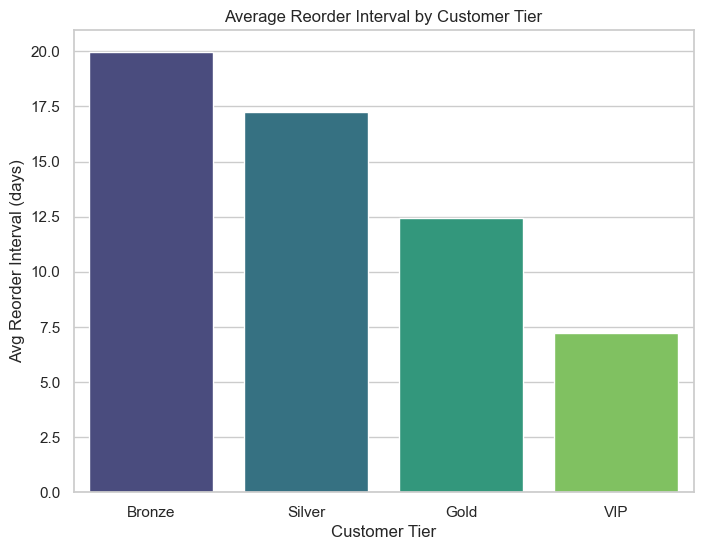

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(
    data=customer_data, 
    x='tier', 
    y='avg_reorder_interval', 
    palette='viridis', 
    ci=None,
    order=['Bronze', 'Silver', 'Gold', 'VIP']  # 순서 강제
)
plt.title('Average Reorder Interval by Customer Tier')
plt.xlabel('Customer Tier')
plt.ylabel('Avg Reorder Interval (days)')
plt.show()


     tier  avg_reorder_interval  projected_interval  predicted_freq_increase_%
0  Bronze             19.960406           17.960406                  10.019836
1  Silver             17.246415           14.746415                  14.495767
2    Gold             12.428990            7.428990                  40.228529
3     VIP              7.210621            7.210621                   0.000000


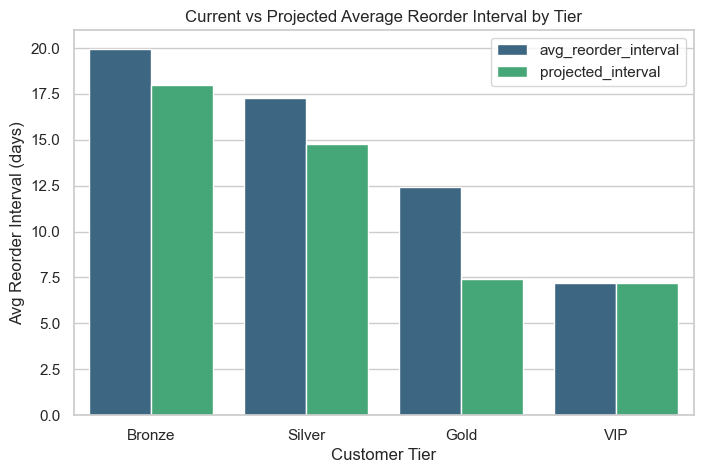

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load data
orders = pd.read_csv('orders.csv')  # order_id, user_id, days_since_prior_order

# 2️⃣ Compute total orders per user
total_orders = orders.groupby('user_id')['order_id'].nunique().reset_index()
total_orders.columns = ['user_id', 'total_orders']

def assign_tier(x):
    if x <= 5:
        return 'Bronze'
    elif x <= 15:
        return 'Silver'
    elif x <= 30:
        return 'Gold'
    else:
        return 'VIP'

total_orders['tier'] = total_orders['total_orders'].apply(assign_tier)

avg_interval = orders.groupby('user_id')['days_since_prior_order'].mean().reset_index()
avg_interval.columns = ['user_id', 'avg_reorder_interval']

customer_data = pd.merge(total_orders, avg_interval, on='user_id', how='left')

tier_avg = customer_data.groupby('tier')['avg_reorder_interval'].mean().reindex(['Bronze','Silver','Gold','VIP']).reset_index()

impact = {
    'Bronze': -2,   # reduce 2 days
    'Silver': -2.5,
    'Gold': -5,
    'VIP': 0
}
tier_avg['projected_interval'] = tier_avg.apply(lambda row: row['avg_reorder_interval'] + impact[row['tier']], axis=1)
tier_avg['predicted_freq_increase_%'] = tier_avg.apply(
    lambda row: ((row['avg_reorder_interval'] - row['projected_interval']) / row['avg_reorder_interval'])*100, axis=1
)

print(tier_avg)

plt.figure(figsize=(8,5))
sns.barplot(data=tier_avg.melt(id_vars='tier', value_vars=['avg_reorder_interval','projected_interval']),
            x='tier', y='value', hue='variable', palette='viridis')
plt.title('Current vs Projected Average Reorder Interval by Tier')
plt.ylabel('Avg Reorder Interval (days)')
plt.xlabel('Customer Tier')
plt.legend(title='')
plt.show()


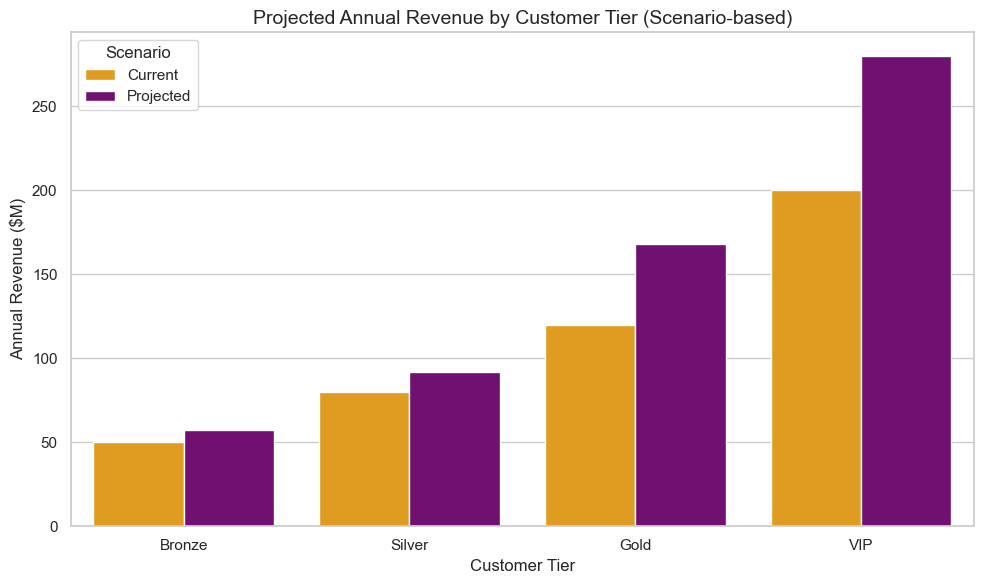

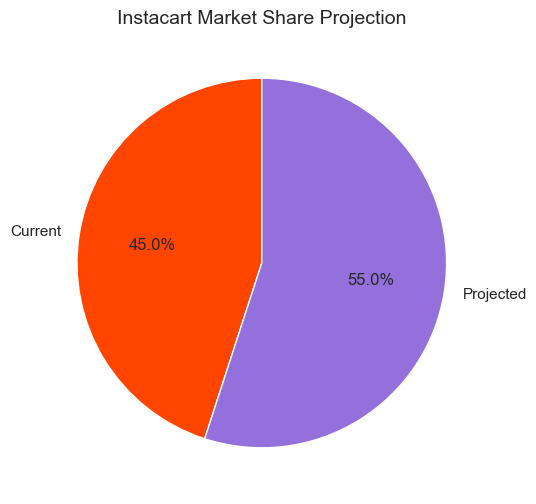

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

tiers = ['Bronze', 'Silver', 'Gold', 'VIP']
current_revenue = [50, 80, 120, 200]      
projected_revenue = [57, 92, 168, 280]    

df_revenue = pd.DataFrame({
    'Tier': tiers * 2,
    'Scenario': ['Current']*4 + ['Projected']*4,
    'Revenue_M': current_revenue + projected_revenue
})

# --- Bar Chart: Current vs Projected Revenue
plt.figure(figsize=(10,6))
palette_colors = ['#FFA500', '#800080'] 
sns.barplot(data=df_revenue, x='Tier', y='Revenue_M', hue='Scenario', palette=palette_colors)
plt.title('Projected Annual Revenue by Customer Tier (Scenario-based)', fontsize=14)
plt.ylabel('Annual Revenue ($M)', fontsize=12)
plt.xlabel('Customer Tier', fontsize=12)
plt.legend(title='Scenario')
plt.tight_layout()
plt.show()

market_total = 1000  
current_instacart_share = 18  
projected_instacart_share = 22  

df_market = pd.DataFrame({
    'Scenario': ['Current', 'Projected'],
    'MarketShare_%': [current_instacart_share, projected_instacart_share]
})

plt.figure(figsize=(6,6))
colors = ['#FF4500', '#9370DB'] 
plt.pie(df_market['MarketShare_%'], labels=df_market['Scenario'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Instacart Market Share Projection', fontsize=14)
plt.show()
